EOSC 453 Assignment 4: Subsidence  
Francis Rossmann

# Question 1
*Consider an intracontinental rift that experienced thermal subsidence over the last 100 Myr, following an initial period of extensional faulting.  The subsidence history can be understood in terms of the depths of dated horizons over time.  These depths are corrected for post-depositional compaction, paleobathymetry, eustasy, and isostatic compensation.  The values for one particular case are shown in Table 1.  The left column provides the ages/times at which the marker horizon was at the corresponding elevation shown in the right column (negative values are below sea level).*    


The elevation/age data is given as follows:   

| Age (Ma) | Elevation | 
|:--------|:----------:|
| 100| 0.217  | 
| 65 | -1.031 |
| 55 | -1.251 |
| 20 | -1.704 |
| 0  | -1.854 |



We are given the following parameters:   

Thermal diffusivity: $K = 1e-6$ m2s-1  
Initial lithosphere thickness: $y_L = 110$  km 	 
Initial crustal thickness: $y_c = 31$ km    
Aesthenosphere temperature: $T_m = 1333$ degC     
Thermal expansion coefficient: $\alpha = 3.3e-5$ degC-1   
Density of mantle: $\rho_m = 3300$ kgm-3    
Density of crust: $\rho_s = 2100$ kgm-3    
Density of water: $\rho_w = 1035$ kgm-3 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# preliminaries:
y_l = 110 * 1000  # m
y_c = 31 * 1000  # m
Tm = 1333  # °C
K = 10 ** (-6)  # m2s-1
alpha = 3.3e-5  # (°C-1)
rho_m = 3300  # kg/m3
rho_s = 2100  # kg/m3
rho_w = 1035  # kg/m3

times = np.array([100, 65, 55, 20, 0])  # Myr ago?
elevations = -np.array([0.217, -1.031, -1.251, -1.704, -1.854]) * 1000  # m

## A.
*Plot the data in Table 1 to produce a curve for tectonic (or thermal) subsidence since 100 Ma (5 pts).*  

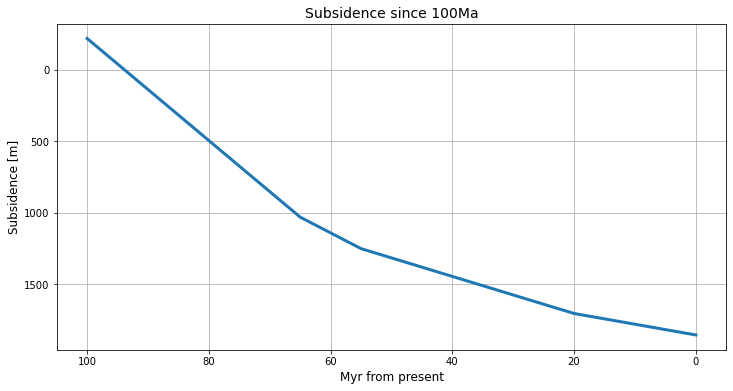

In [4]:
#  a)
fig = plt.figure(figsize=(12, 6))
plt.plot(times, elevations, linewidth=3)
plt.grid()
plt.ylabel("Subsidence [m]", fontsize=12)
plt.xlabel("Myr from present", fontsize=12)
plt.title("Subsidence since 100Ma", fontsize=14)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

## B.
*Then use the values in Table 2 to calculate the thermal time constant ($\tau$) for this basin (watch your units) (5 pts).*

The thermal time constant is given as: 
$$ \tau = \frac{y_{L}^2}{\pi^2K}$$

Plugging in the given values for $y_L$ and $K$ below: 

In [5]:
# b)
# calculate the thermal time constant:
tau = (y_l ** 2) / (np.pi ** 2 * K)  # seconds...
tau_myr = tau / 60 / 60 / 24 / 365 / 1e6
print(f"Thermal time constant: {tau_myr:.1f} Myr")

Thermal time constant: 38.9 Myr


## C-D.
- *Plot the subsidence values from Table 1 against the parameter (1-e-t/$\tau$), remembering that t is time since rifting, not the age (5 pts).*
- *Fit a curve to this plot, and determine the slope of the curve (5 pts).*  

Given $\tau = 38.9$ Myr we can easily make this plot below.  

A best fit line is fit using linear least squares and results in a slope $m =  1727$ with $R^2 = 0.8$. 


The slope of the linear regression is 1727
R-square for fit is 0.80


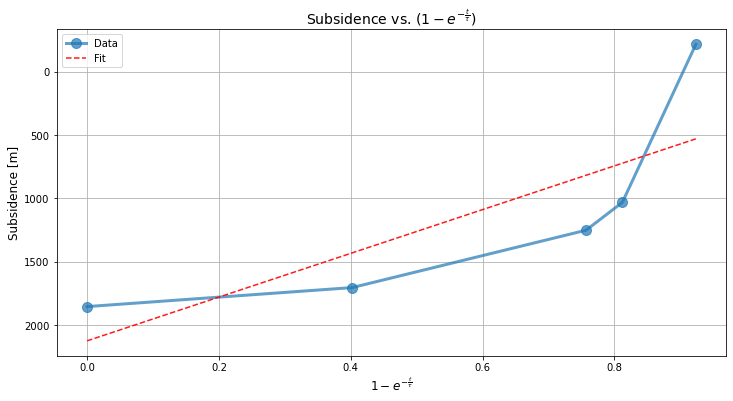

In [6]:
#  c)
#  plot subsidence against scaled time constant:
etime = 1 - np.exp(-times / tau_myr)  # dimensionless [Myr/Myr]


#  d) 
# fit a line with linear least squares (simple)
lin_regress = stats.linregress(etime, elevations)
m = lin_regress.slope
print(f"The slope of the linear regression is {-lin_regress.slope:.0f}")
print(f'R-square for fit is {-lin_regress.rvalue:.2f}')

# make the plot:
plt.figure(figsize=(12, 6))
plt.plot(
    etime, elevations, label="Data", linewidth=3, markersize=20, marker=".", alpha=0.7
)
plt.plot(etime, lin_regress.slope * etime + lin_regress.intercept, "r", label="Fit", linestyle="--", alpha=0.9)
plt.legend()
plt.ylabel("Subsidence [m]", fontsize=12)
plt.xlabel(r"$1-e^{-\frac{t}{\tau}}$", fontsize=12)
plt.title(r"Subsidence vs. $(1-e^{-\frac{t}{\tau}})$", fontsize=14)
plt.grid()
plt.gca().invert_yaxis()

## E.
*Now follow Allen and Allen’s approach to determine E0 and $\beta$ (realize that you will need to use the iterative method of solution to determine $\beta$). Compute the results of $E_0$ and $\beta$ for the competing cases in which the basin was:* 
1. *(1E.1) filled with water*
2. *(1E.2) filled with sediment (15 pts).*

The slope $m$ of the regression line above is equal to: 

$$ m = E_{0}\frac{\beta}{\pi} \sin (\frac{\pi}{\beta})$$
where, 
$$
E_{0}=\frac{4 y_{L} \rho_{m} \alpha T_{m}}{\pi^{2}\left(\rho_{m}-\rho_{s}\right)}
$$


We can thus easily calculate $E_0$ given the problem parameters $y_L, \rho_m, \alpha, T_m, \rho_s$, then iteratively search for the value of $\beta$ which satisfies the relationship the slope $m$ of our regression. 

**Solution:**   

See code block below for implementation. The equation for slope is calculated for a range of $\beta$ values and the intersection of this curve with the calculated regression slope gives us the solution for $\beta$. $E_0$ can be evaluated analytically for values of $\rho_w$ and $\rho_s$. 

*(1E.1) filled with water:*     
Stretch factor $\beta = 1.9$     
$ E_0 = 2900$ m     

  
*(1E.2) filled with sediment:*     
Stretch factor $\beta = 1.36$    
$ E_0 = 5400$ m  

Water filled basin:
 	Beta = 1.9
 	E0 = 2.9e+03
Seds filled basin:
 	Beta = 1.36
 	E0 = 5.4e+03


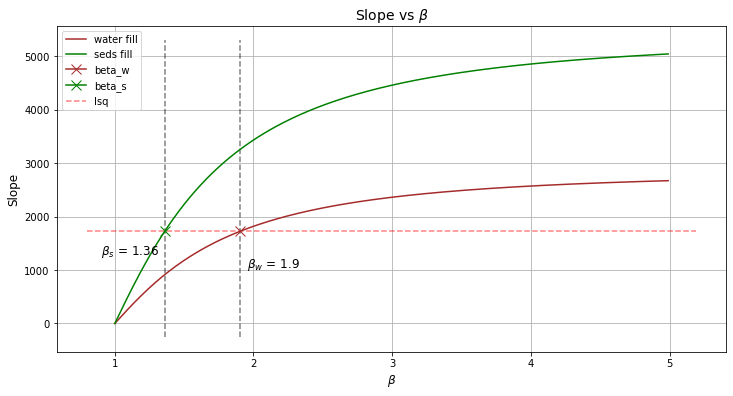

In [7]:
#  e) find E0 and beta...
E0_w = (4 * y_l * rho_m * alpha * Tm) / (np.pi ** 2 * (rho_m - rho_w))  # for water
E0_s = (4 * y_l * rho_m * alpha * Tm) / (np.pi ** 2 * (rho_m - rho_s))  # for seds


dummy_betas = np.arange(1, 5, 0.01)


def get_slopes(E0, betas):
    """slope is equal to E0*(beta/pi)*sin(pi/beta) (from Allen&Allen pg. 511)
    we know slope and beta so shotgun some slopes for different betas"""
    slopes = [E0 * (beta / np.pi) * np.sin(np.pi / beta) for beta in betas]
    return slopes


slopes_w = get_slopes(E0_w, dummy_betas)
slopes_s = get_slopes(E0_s, dummy_betas)
beta_w = dummy_betas[np.isclose(slopes_w, -m, rtol=0.003)]
beta_s = dummy_betas[np.isclose(slopes_s, -m, rtol=0.01)]
print(f"Water filled basin:\n \tBeta = {beta_w[0]:.3}\n \tE0 = {E0_w:.2}")
print(f"Seds filled basin:\n \tBeta = {beta_s[0]:.3}\n \tE0 = {E0_s:.2}")

fig = plt.figure(figsize=(12, 6))
plt.plot(dummy_betas, slopes_w, color="brown", label="water fill")
plt.plot(dummy_betas, slopes_s, color="g", label="seds fill")
plt.xlabel(r"$\beta$", fontsize=12)
plt.ylabel("Slope", fontsize=12)
xl = plt.xlim()
plt.hlines(-m, xl[0], xl[1], color="r", linestyle="--", alpha=0.5, label=f"lsq")
yl = plt.ylim()
plt.vlines(beta_w, yl[0], yl[1], color="k", linestyle="--", alpha=0.5)
plt.vlines(beta_s, yl[0], yl[1], color="k", linestyle="--", alpha=0.5)

plt.title(r"Slope vs $\beta$", fontsize=14)
plt.grid()
plt.plot(beta_w, -m, marker="x", color="brown", markersize=10, label="beta_w")
plt.plot(beta_s, -m, marker="x", color="g", markersize=10, label="beta_s")
plt.legend()
plt.text(1.95, 1050, r"$\beta_{w}$ = " + f"{beta_w[0]:.3}", fontsize=12);
plt.text(0.9, 1300, r"$\beta_{s}$ = " + f"{beta_s[0]:.3}", fontsize=12);

## F. 
*Explain the geodynamic reasons for the different values of $\beta$ that result (15 pts).*

The higher value of $\beta$ for a water-filled basin indicates a larger amount of crustal stretching/thinning in comparison to a sediment-filled basin. Water: 1.9 stretch factor. Sediments: 1.36 stretch factor. The fill type clearly exerts some control on the stretch factor. 

We know that the slope of the regression line of subsidence heights vs scaled time ($1 - e^{-t/\tau}$) is the same for the water-filled vs. sediment filled cases. A higher fill density means a higher value of $E0$: to satisfy the constant slope, $m$ this means that the $\frac{\beta}{\pi} \sin (\frac{\pi}{\beta})$ factor must decrease, i.e. $\beta$ decreases with increasing fill density. This is potentially related to higher density loads having long wavelength flexural effects on the surrounding plate which leads to less stretching (more distributed load?). 

# Question 2:
*'Geohistory' analysis is a useful procedure for understanding basin evolution in terms of sediment accumulation history and tectonic subsidence.  Tectonic subsidence is defined as the vertical (downward) subsidence of a reference horizon (commonly the underlying, pre-basinal basement) in the absence of water and sediment loads.  Tectonic subsidence is driven principally by tectonic forces associated with basin evolution. After deposition, sediments are compacted to varying degrees depending on the lithology and the amount of burial (“overburden”).  In order to construct a “geohistory” diagram for a particular basin, geoscientists first need to remove the effects of compaction. Mathematical “decompaction” is accomplished by a technique called “backstripping” in which the effects of water loading and sediment loading are removed.  In order to understand the history of tectonic subsidence, further corrections can be made if data are available for the water depth, global sea level, etc. The following exercises will improve understanding of the techniques involved in backstripping, and the generation of diagrams that depict the history of sediment accumulation and tectonic subsidence during basin evolution.*

![image.png](image.png)


*Decompaction..  Consider the stratigraphic column provided above, consisting of 6 stratigraphic units and 1 unconformity.  These 7 elements have a total observed thickness of 5100 meters.  Using the methods and equations discussed in class, generate a table listing the original “decompacted” thicknesses for each of the 7 units.  The table provided will help visualize the series of steps involved in the backstripping process (15 pts).!*

| c      | initial porosity | lithology | grain density |
|:--------|:------------------:|:-----------:|---------------:|
| 0.0005 | 0.5              | shale     | 2720 kgm-3    |
| 0.0003 | 0.4              | sandstone | 2650 kgm-3    |
| 0.0007 | 0.5              | limestone | 2710 kgm-3    |
* from: (Angevine et al., Fig. 3.11)	

In [8]:
# %% QUESTION 2:
# preliminaries:
ages = [0, 10, 20, 30, 50, 60, 70, 75][::-1]  # Ma, reversed

# set the constants for each lithology:
shale = {"c": 0.0005, "phi": 0.5, "rho": 2720}
sand = {"c": 0.0003, "phi": 0.4, "rho": 2650}
lime = {"c": 0.0007, "phi": 0.5, "rho": 2710}

# pack all the lithologies in a dictionary:
vars = {"shale": shale, "sand": sand, "lime": lime, "none": None}

# set up the problem:
depths = np.array(
    [0, 1000, 1800, 1900, 1900, 2800, 2900, 5100]
)  # top down depths to edges
depths_delta = np.array([1000, 800, 100, 0, 900, 100, 2200])  # top down thickneses
compacted_depths = np.append(0, np.cumsum(depths_delta[::-1]))
midpoints = depths[1:] - depths_delta / 2
liths = [
    "lime",
    "shale",
    "sand",
    "none",
    "lime",
    "shale",
    "sand",
]  # top down lithologies


___
## A.
*Sediment Accumulation History.  Now, consider the stratigraphic ages provided for the 7 elements (6 stratigraphic units and 1 unconformity).  First, construct a sediment accumulation diagram based on (1) the compacted (observed) stratigraphic thicknesses and (2) the decompacted stratigraphic thicknesses (10 pts).*    


First we consider the entire column of lithologies as shown in the image above. We can calculate the porosity of each stratigraphic layer at depth $z$ given an initial porosity $\phi_0$ and compaction constant $c$: 

$$\phi_{new}=\phi_{old} e^{-c z}$$

Now, we remove the top-most block from the column and consider the effect of this unloading. The porosities below the removed block can be re-calculated as above with an adjusted depth $z$ and given their last porosity, calculated in the last step. 

Given the newly adjusted porosity, we can calculate the new thickness, $y'$, expected due to the removal of the uppermost block and the increase in porosity: 

$$y'=\frac{(1-\phi_{old}) }{\left(1-\phi_{new}\right)}y$$

The code cell below iteratively applies these equations using the functions `update_phi() ` and `update_T()` until all blocks have been removed from the oldest unit. This results in a  7x7 upper diagonal matrix for both porosity, $\phi$ and thickness, $T$, where the j-th column is the j-th unpacking iteration, and each i-th row corresponds to the i-th lithology. This is just like the table included in the assignment question from Angevine. The results of the decompaction are shown in *Table 1: Decompacted Thickness*,  and *Table 2: Decompacted Porosities* below the code block. 


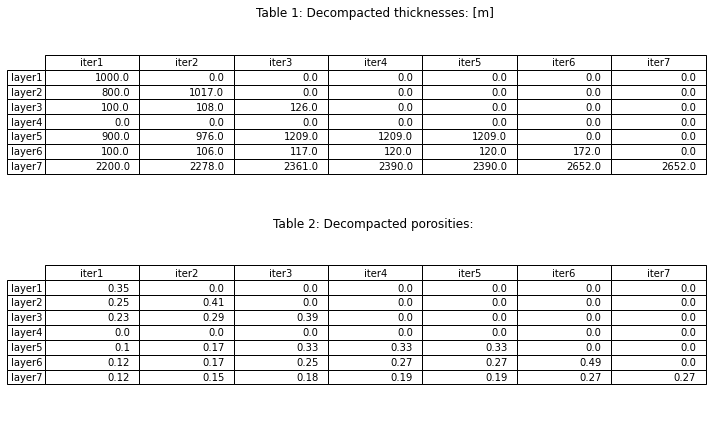

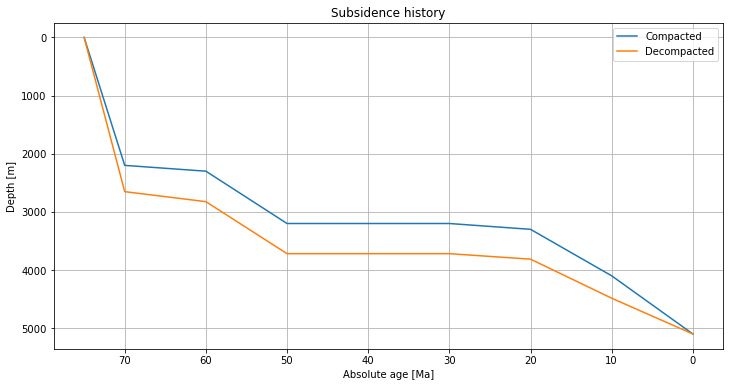

In [12]:
#%% decompaction:
# 1) calculate in situ compacted porosities:
phis = np.zeros_like(depths_delta, dtype=object)
for ii in range(len(liths)):
    if depths_delta[ii] > 0:
        phis[ii] = np.around(
            vars[liths[ii]]["phi"] * np.exp(-vars[liths[ii]]["c"] * midpoints[ii]),
            decimals=2,
        )
    else:
        phis[ii] = 0


def update_phi(consts, midpoint):
    """Updates porosity given a change in burial midpoint"""
    phi_new = consts["phi"] * np.exp(-consts["c"] * midpoint)
    return np.around(phi_new, decimals=2)


def update_T(height, phi_old, phi_new):
    """Updates the thickness of a layer given a change in porosity"""
    T_new = ((1 - phi_old) * height) / (1 - phi_new)
    return np.around(T_new, decimals=0)


# Initialize empty arrays for decompacted porosity and thicknesses:
phi_array = np.zeros(shape=(7, 7))
T_array = np.zeros(shape=(7, 7))
phi_array[:, 0] = phis.T  # set the first column to initial porosity @ depth
T_array[:, 0] = depths_delta.T  # set first column to initial thicknesses

# Iteratively decompact by looping over columns:
for ii in range(1, 7):
    # then loop over rows (blocks):
    for jj in range(1, 7):
        # default to zero porosity and height at the unconfomity:
        if np.all(T_array[jj, :] == 0):
            phi_array[jj, ii] = 0
            T_array[jj, ii] = 0
        # skip the blocks we've removed:
        elif jj < ii:
            phi_array[jj, ii] = 0
            T_array[jj, ii] = 0
        # remove the top block and use midpoint for porosity calculation:
        elif jj == ii:
            phi_array[jj, ii] = update_phi(vars[liths[jj]], T_array[jj, ii - 1] / 2)
            T_array[jj, ii] = update_T(
                T_array[jj, ii - 1], phi_array[jj, ii - 1], phi_array[jj, ii]
            )
        # solve for underlying blocks, using adjusted midpoints:
        else:
            phi_array[jj, ii] = update_phi(
                vars[liths[jj]],
                np.sum(T_array[:, ii][ii - 1 : jj]) + T_array[jj, ii - 1] / 2,
            )
            T_array[jj, ii] = update_T(
                T_array[jj, ii - 1], phi_array[jj, ii - 1], phi_array[jj, ii]
            )

# sum over columns: 
decompacted_depths = np.append(np.sum(T_array, axis=0), 0)


# plot the tables:
fig = plt.figure(figsize=(10, 6))
ax1, ax2 = fig.subplots(2)
ax1.table(
    cellText=np.round(T_array),
    colLabels=["iter" + str(ii + 1) for ii in range(7)],
    rowLabels=["layer" + str(ii + 1) for ii in range(7)],
    loc="center",
)
ax1.set_title("Table 1: Decompacted thicknesses: [m]")
ax1.axis("off")
ax2.table(
    cellText=np.around(phi_array, decimals=2),
    colLabels=["iter" + str(ii + 1) for ii in range(7)],
    rowLabels=["layer" + str(ii + 1) for ii in range(7)],
    loc="center",
)
ax2.set_title("Table 2: Decompacted porosities: ")
ax2.axis("off")
fig.tight_layout()

# plot the subsidence curves, compacted and decompacted:
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot()
plt.plot(ages, compacted_depths, label="Compacted")
plt.plot(ages, decompacted_depths[::-1], label="Decompacted")
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.grid()
plt.ylabel("Depth [m]")
ax.set_xlabel("Absolute age [Ma]")
plt.title("Subsidence history")
plt.legend();


## C.  
*Tectonic subsidence.  In order to understand tectonic subsidence, we must consider the original water depths during deposition, and correct the sediment accumulation history calculated in 2(B).  For each stratigraphic unit, consider the estimated water depths at the time of deposition.  Based on these water depths, modify the sediment accumulation diagram from 2(B). Conduct an Airy isostatic correction at each point in the subsidence curve to estimate the tectonically driven subsidence (15 pts).*

Given the bathymetry data, I take the **maximum** water depth for each unit and simply add this depth to the decompacted thicknesses. This means that the bathymetry-corrected subsidence curve is the decompacted subsidence curve with the bathymetric depths added on top. See figure below code block for visualization. 

To find Airy compensated tectonic subsidence, we first need to calculate the bulk density of each individual unit in the column. Using *Table 2: decompacted porosities*, we can calculate density of each unit given it's porosity at depth. The change in density due to the change in porosity is assumed to be due to filling the pore space with water, and so the density of the i-th block is given as: 


$$\rho_{b, i}=\phi_{i} \rho_{w}+\left(1-\phi_{i}\right) \rho_{s, i}$$


Then we can find the total bulk density of entire column using the calculated unitary bulk densities above combined with the thicknesses in *Table 1: decompacted thickness* by summing over layers and dividing by total column height: 
$$\bar{\rho}_{b}=\frac{\sum_{i} \rho_{b, i} y_{i}'}{\sum_{i} y_{i}'}$$

Where the entire column at a given time has height equal to: 

$$ S = \sum_{i} y_{i}' $$


From Allen & Allen (2005), equation 9.37: The total Airy-compensated tectonic subsidence including bathymetric information is given as: 

$$Y=S\left(\frac{p_{m}-\bar{\rho}_{b}}{\rho_{m}-\rho_{w}}\right)-\Delta_{S L}\left(\frac{\rho_{w}}{\rho_{m}-\rho_{w}}\right)+\left(W_{d}-\Delta_{S L}\right)$$

Where $W_d$ is the water depth at the time of inquiry. We can let $\Delta_{S L}$ equal zero for this problem because eustatic sea level is assumed to be constant,  so the equation above simplifies to: 

$$Y=S\left(\frac{p_{m}-\bar{\rho}_{b}}{\rho_{m}-\rho_{w}}\right) + W_{d}$$

This is easy to implement in the code below, see the figure for the plotted deliverable. Note again that this is assuming the maximum values since I'm using the max. bathymetry data. 

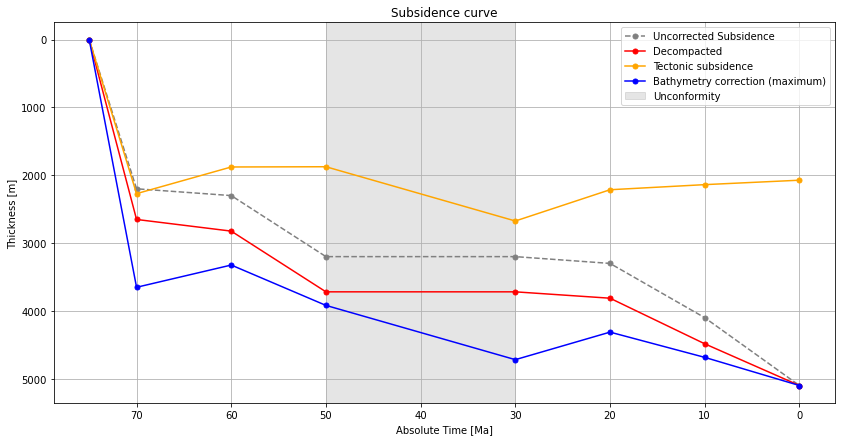

In [10]:
# %% add the bathymetric correction:
bath_max = [0, 200, 500, 1000, 200, 500, 1000, 0]  # max water 'thickness'' [m]
bath_decompacted_max = decompacted_depths + bath_max

# calculate the bulk density of each layer per column:
def update_local_rho(phi, consts):
    """eq. 9.34, Allen & Allen"""
    rho_w = 1035  # kgm-3, water density
    rho_new = phi * rho_w + (1 - phi) * consts["rho"]
    return np.round(rho_new)


rho_array = np.zeros_like(phi_array)
# loop over columns, then rows:
for ii in range(7):
    for jj in range(7):
        # unconformity defaults to zero:
        if np.all(T_array[jj, :] == 0):
            rho_array[jj, ii] = 0
            # skip the blocks we've removed:
        elif jj < ii:
            rho_array[jj, ii] = 0
            # otherwise update the density for updated porosity:
        else:
            rho_array[jj, ii] = update_local_rho(phi_array[jj, ii], vars[liths[jj]])


# then calculate the bulk density of the entire column:
# eq. 9.35
column_rho = np.zeros(shape=(7,))
for ii in range(7):
    column_rho[ii] = np.sum(
        (rho_array[:, ii] * T_array[:, ii]) / decompacted_depths[ii]
    )

# calculate Airy compensated tectonic subsidence for each column:
# eq. 9.37
sub_corr = np.zeros(shape=(7,))
for ii in range(7):
    sub_corr[ii] = decompacted_depths[ii] * (
        (rho_m - column_rho[ii]) / (rho_m - rho_w)
    ) + (bath_max[ii])


airy_corrected_depths = np.append(sub_corr, 0)[
    ::-1
]  # slap a zero on the end and reverse


# make a final figure:
fig, ax = plt.subplots(figsize=(14, 7))
ax = plt.subplot()
plt.plot(
    ages,
    compacted_depths,
    label="Uncorrected Subsidence",
    marker=".",
    markersize=10,
    color="gray",
    linestyle="--",
)

plt.plot(
    ages,
    decompacted_depths[::-1],
    label="Decompacted",
    marker=".",
    markersize=10,
    color="red",
)

plt.plot(
    ages,
    airy_corrected_depths,
    label="Tectonic subsidence",
    marker=".",
    markersize=10,
    color="orange",
)
plt.plot(
    ages,
    bath_decompacted_max[::-1],
    label="Bathymetry correction (maximum)",
    color="blue",
    marker=".",
    markersize=10,
)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.grid()
plt.ylabel("Thickness [m]")
ax.set_xlabel("Absolute Time [Ma]")
plt.title("Subsidence curve")
xl = plt.xlim()
yl = plt.ylim()
ax.axvspan(30, 50, alpha=0.1, color="k", label="Unconformity")
plt.legend();

## D:
*Interpretation.  Provide a written summary for the depositional history of this basin (10 pts).*

1. **75-70 Ma**: Non-marine sandstone sediments are deposited in as graben fill in an extensional basin. Sediments are buried and lithified at depth, Depositional environment is initially sub-aerial but becomes submarine with a maximum depth of 100m. Subsidence is large (over 2km). 
2. **70-60 Ma**: Shale sediments are deposited synrift and along the basin slope. Water depth is between 200-500 metres. Shale sediments laid down on top of underlying sandstone sediments contribute to increasing the pressure on the underlying sediments, reducing porosity. Some uplift occurs.   
3. **60 - _ Ma**: Limestone sediments are deposited along the basin shelf, end of deposition unclear. Water depth is between 100-200 metres.
4. **50-30 Ma**: Uplift and erosion occurs during this time period, creating an unconformity which removes about 20 Ma of history. Water depth at the beginning and end of the this period has seen some changes. This period of unconformity sees a net subsidence. 
5. **30-20 Ma**: Sandstone sediments are deposited in a submarine fan between the upper and lower basin slope, water depths range from 500-1000 metres. Sediments are lithified at depth.
6. **20-10 Ma**: Relative uplift occurs. Shale sediments are deposited along the basin slope, sea level between 200-500 metres. 
7. **10-0 Ma**:  More uplift occurs. Limestone sediments are deposited along the basin shelf, water depth is between 0-200 metres.  